In [1]:
import numpy as np
import PIL.Image
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
IMAGE_SIZE = (400, 150, 3)
RESIZED_SIZE = (100, 50, 3)
RESIZED_SIZE_PIL = (RESIZED_SIZE[1], RESIZED_SIZE[0], RESIZED_SIZE[2])
DATASET_PATH = "./dataset_rot/"
DATASET_PATH = os.path.abspath(DATASET_PATH)
CLASSES = next(os.walk(DATASET_PATH))[1]

print(DATASET_PATH)
print(CLASSES)


/tmp/deepl/dataset_rot
['octane', 'werewolf', 'breakout', 'aftershock']


In [3]:
def load_data():
    # Récupération des fichiers
    files = glob.glob(f"{DATASET_PATH}/**/*.jpg", recursive=True)

    # Initialise les structures de données
    x = np.zeros((len(files), *RESIZED_SIZE_PIL))
    y = np.zeros((len(files), 1))

    # print(f"x.shape = {x.shape}")

    for i, path in enumerate(files):
        # Lecture de l'image
        img = PIL.Image.open(path)

        # print(f"img.size = {img.size}")

        # Redimensionnement de l'image
        img = img.resize(RESIZED_SIZE[:-1], PIL.Image.ANTIALIAS)

        # print(f"img.size = {img.size}")

        test = np.asarray(img)

        # print(f"test.shape = {test.shape}")

        # Remplissage de la variable x
        x[i] = test

        # On récupère l'index dans le path
        class_label = path.split("/")[-2]

        # On récupère le numéro de la classe à partir du string
        class_label = CLASSES.index(class_label)

        # Remplissage de la variable y
        y[i] = class_label

    return x, y


In [4]:
x, y = load_data()
x = x / 255


/tmp/ipykernel_850277/2192415425.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(RESIZED_SIZE[:-1], PIL.Image.ANTIALIAS)


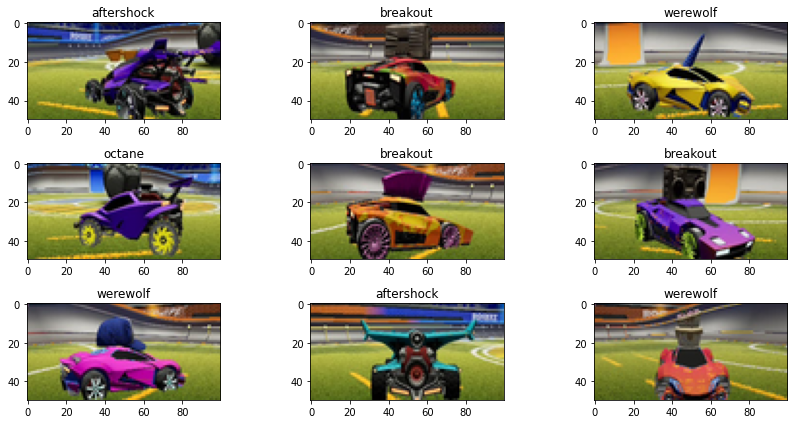

In [5]:
# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
indices = np.arange(x.shape[0])
np.random.shuffle(indices)

plt.figure(figsize=(12, 6))

for i in range(0, 3 * 3):
    plt.subplot(3, 3, i + 1)
    plt.title(CLASSES[int(y[indices[i]])])
    plt.imshow(x[indices[i]])

plt.tight_layout()
plt.show()


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers


In [7]:
model = Sequential()

model.add(InputLayer(input_shape=RESIZED_SIZE_PIL))

model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(92, 3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(250, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.summary()

adam = optimizers.Adam(learning_rate=7e-6)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x, y, validation_split=0.15, epochs=25)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 21, 92)         53084     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 10, 92)        0

2022-04-19 09:02:35.978538: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-19 09:02:37.168772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1538 MB memory:  -> device: 0, name: Quadro K620, pci bus id: 0000:03:00.0, compute capability: 5.0


Epoch 1/25


2022-04-19 09:02:39.482378: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-04-19 09:02:39.750472: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


107/107 [==============================] - 8s 53ms/step - loss: 1.3257 - accuracy: 0.4882 - val_loss: 1.9736 - val_accuracy: 0.0000e+00
Epoch 2/25
107/107 [==============================] - 5s 43ms/step - loss: 1.2673 - accuracy: 0.6597 - val_loss: 2.0838 - val_accuracy: 0.0000e+00
Epoch 3/25
107/107 [==============================] - 5s 43ms/step - loss: 1.2133 - accuracy: 0.7159 - val_loss: 1.9761 - val_accuracy: 0.0000e+00
Epoch 4/25
107/107 [==============================] - 5s 43ms/step - loss: 1.1449 - accuracy: 0.7559 - val_loss: 1.9845 - val_accuracy: 0.0000e+00
Epoch 5/25
107/107 [==============================] - 5s 43ms/step - loss: 1.0666 - accuracy: 0.7482 - val_loss: 1.9626 - val_accuracy: 0.0000e+00
Epoch 6/25
107/107 [==============================] - 5s 43ms/step - loss: 0.9754 - accuracy: 0.7906 - val_loss: 1.8962 - val_accuracy: 0.0000e+00
Epoch 7/25
107/107 [==============================] - 5s 43ms/step - loss: 0.8785 - accuracy: 0.8009 - val_loss: 1.6826 - val_acc

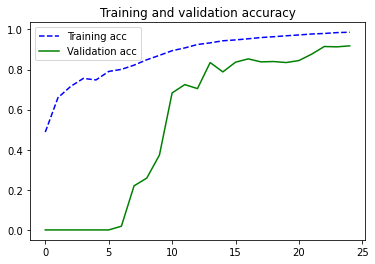

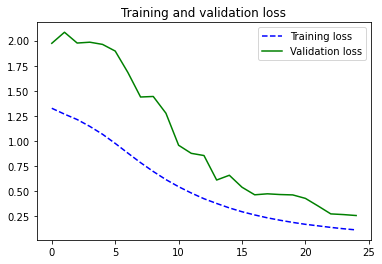

In [8]:
def plot_training_analysis():
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    plt.plot(epochs, acc, "b", linestyle="--", label="Training acc")
    plt.plot(epochs, val_acc, "g", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "b", linestyle="--", label="Training loss")
    plt.plot(epochs, val_loss, "g", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()


plot_training_analysis()


(4000,)
(4000, 1)
tf.Tensor(
[[ 988    6    6    0]
 [   0 1000    0    0]
 [  11    0  989    0]
 [  44   18    8  930]], shape=(4, 4), dtype=int32)


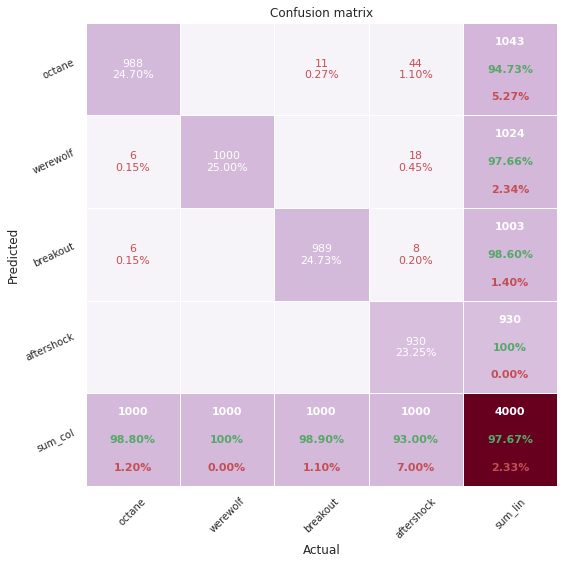

In [30]:
prediction = model.predict(x)
prediction = np.argmax(prediction, axis=1)
print(prediction.shape)
print(y.shape)

res = tensorflow.math.confusion_matrix(y, prediction)
print(res)
# plt.matshow(res)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from pretty_confusion_matrix import pp_matrix

# df_cm = pd.DataFrame(res, CLASSES, CLASSES)
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 15})
# plt.show()

# get pandas dataframe
df_cm = pd.DataFrame(res, CLASSES, CLASSES)
# colormap: see this and choose your more dear
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)

In [ ]:
IMAGE_SIZE = (400, 150, 3)
RESIZED_SIZE = (100, 50, 3)
RESIZED_SIZE_PIL = (RESIZED_SIZE[1], RESIZED_SIZE[0], RESIZED_SIZE[2])
DATASET_PATH = "./data/"
DATASET_PATH = os.path.abspath(DATASET_PATH)
CLASSES = next(os.walk(DATASET_PATH))[1]

print(DATASET_PATH)
print(CLASSES)


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import sqlite3

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
SHUFFLE_SIZE = 32
LIMIT = 10000


def customGenerator():
    data = (
        sqlite3.connect(f"{DATASET_PATH}/index.db")
        .execute(f"SELECT uuid, model from data order by random() LIMIT {LIMIT}")
        .fetchall()
    )

    for uuid, model in data:
        img = tf.io.read_file(f"{DATASET_PATH}/{uuid}.jpg")
        img = tf.image.decode_jpeg(img, channels=IMAGE_SIZE[2])
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, RESIZED_SIZE[:-1])

        label = tf.convert_to_tensor(model, dtype=tf.uint8)

        yield img, label


def cutout(image, label):
    img = tfa.image.random_cutout(image, (6, 6), constant_values=1)
    return (img, label)


def rotate(image, label):
    img = tfa.image.rotate(image, tf.constant(np.pi))
    return (img, label)


def set_shapes(image, label):
    image.set_shape(RESIZED_SIZE)
    label.set_shape([])
    return image, label


dataset = tf.data.Dataset.from_generator(generator=customGenerator, output_types=(tf.float32, tf.uint8))

(dataset_length,) = sqlite3.connect(f"{DATASET_PATH}/index.db").execute("SELECT count(uuid) from data").fetchone()
dataset_length = min(dataset_length, LIMIT)

print(f"dataset_length = {dataset_length}")
print(f"batch size = {BATCH_SIZE}")
print(f"number of batchs = {dataset_length // BATCH_SIZE}")

print()

train_size = int(0.8 * dataset_length / BATCH_SIZE)
print(f"train_size = {train_size}")
print(f"validation_size = {dataset_length - train_size}")

dataset = (
    dataset.shuffle(SHUFFLE_SIZE)
    .map(set_shapes)
    .batch(BATCH_SIZE)
    # .map(cutout)
    .prefetch(AUTOTUNE)
)

dataset_train = dataset.take(train_size)
dataset_validate = dataset.skip(train_size)

# print()
# print(RESIZED_SIZE)
# for boop in dataset_train.take(2):
#     print(boop)

# for image_batch, label_batch in dataset.take(1):
#     print(label_batch.shape, image_batch.shape)
#     pass
# for image_batch, label_batch in dataset_train.take(1):
#     print(label_batch.shape, image_batch.shape)
#     pass
# for image_batch, label_batch in dataset_validate.take(1):
#     print(label_batch.shape, image_batch.shape)
#     pass


In [ ]:
model = Sequential(
    [
        InputLayer(input_shape=RESIZED_SIZE),
        Conv2D(32, 3, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, 3, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(92, 3, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(250, activation="relu"),
        Dense(4, activation="softmax"),
    ]
)

model.summary()

adam = optimizers.Adam(learning_rate=7e-6)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(dataset_train, validation_data=dataset_validate, epochs=25, batch_size=BATCH_SIZE)


In [ ]:
def plot_training_analysis():
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(loss))

    plt.plot(epochs, acc, "b", linestyle="--", label="Training acc")
    plt.plot(epochs, val_acc, "g", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "b", linestyle="--", label="Training loss")
    plt.plot(epochs, val_loss, "g", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()


plot_training_analysis()


In [ ]:
# Save the weights
# model.save('models/rot_25e')